<center> <h1> <u> <font color='red'> Hands on Training on Bangla Language Processing Collocated with CLBLP'23 </font> </u> </h1> </center>

#Libraries

In [1]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
import tensorflow as tf
from tensorflow import keras

CPU times: user 4.78 s, sys: 660 ms, total: 5.44 s
Wall time: 10.6 s


## Fetching the Dataset
Now we will get the dataset form our google drive. A class array will be created which contains the name of the classes we are interested to work with.

In [2]:
!wget -O news.csv https://www.dropbox.com/s/12yza2h4bja9fqy/News_12Class.csv?dl=0

--2023-02-21 09:04:45--  https://www.dropbox.com/s/12yza2h4bja9fqy/News_12Class.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/12yza2h4bja9fqy/News_12Class.csv [following]
--2023-02-21 09:04:46--  https://www.dropbox.com/s/raw/12yza2h4bja9fqy/News_12Class.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc48c060589d9d1d3612d12c9240.dl.dropboxusercontent.com/cd/0/inline/B25Lv98FAVMtU50qajTwWzVa5BM6heBKYM2FY2w9blM2WQecx63HgKBhpQn4cutCE4RdZvEfsLUV9VR1qXjTTjIo_HC86aQeFUEDTw4IgjaLtETlZqkLoufeJFVQuu4uzpGU0gmNyDU4LNWc2TWGwJ_6Kmerxl7iEgK0HMpMZG2orw/file# [following]
--2023-02-21 09:04:47--  https://uc48c060589d9d1d3612d12c9240.dl.dropboxusercontent.com/cd/0/inline/B25Lv98FAVMtU50qajTwWzVa5BM6heBKYM2FY2w9blM2WQecx63HgKBhpQn4cu

In [4]:
%%time
class_names = ['Accident', 'Art', 'Crime', 'Economics', 'Education', 'Entertainment',
               'Environment', 'International', 'Politics', 'Science_tech', 'Sports', 'Suspicious']
               
dataset = pd.read_csv("news.csv")
dataset

CPU times: user 6.26 s, sys: 594 ms, total: 6.86 s
Wall time: 6.85 s


,Unnamed: 0,Text,Category
0,0,নাটোরের বড়াইগ্রাম উপজেলায় মাটির দেয়াল চাপা পড়...,Accident
1,1,চট্টগ্রামের আনোয়ারায় পানিতে ডুবে এক শিশুর মৃত...,Accident
2,2,পূর্ব চীনের শাংডং প্রদেশে কয়লা খনিতে বন্যার প...,Accident
3,3,ঢাকার ধামরাই উপজেলায় ঢাকা-আরিচা মহাসড়কে বুধবা...,Accident
4,4,গত তিনমাসে এ সড়কে দুর্ঘটনায় ৪২ জনের মৃত্যু হয়ে...,Accident
...,...,...,...
95861,95861,খেলা শুরুর ৪০ সেকেন্ডের মধ্যে প্রথম গোল। ৮৯ ম...,Sports
95862,95862,শনিবার বিকাল ৫টায় ঢাকার কেন্দ্রীয় শহীদ মিনার চ...,Sports
95863,95863,নিউজিল্যান্ডের জয়রথ ছুটছেই। ম্যাককালাম-ঝড় উঠছে...,Sports
95864,95864,এফসি কোপেনহেগেনের সঙ্গে ফিরতি খেলায় গোলশূন্য ...,Sports


In [ ]:
dataset.columns

Index(['Unnamed: 0', 'Text', 'Category'], dtype='object')

In [5]:
labels = np.array(dataset['Category'])
print('Total size of the dataset : ',len(dataset))

Total size of the dataset :  95866


The total size of the dataset is 90996. We will build our word embedding model on this dataset

## Data Preprocessing
Here we will process the data by removing punctuation and stop words from the dataset. It is really a important part for the successful implementation of our word embedding model.

### Removing stop words and punctuation
I do not think when we are implementing words embedding there are any need of removing stop words. This effect our cause of interest a little. So there is not need to remove this stop words for this case. But a efficient way of removing stop words are shown below.

In [6]:
%%time
total_words = set() ## list of all words in our dataset

def creating_total_words(words):
     for w in words:
          total_words.add(w)

processed_data = [] ##List of all the processed text

for i in range(len(dataset)):
    text = re.sub('[^\u0980-\u09FF]',' ', dataset['Text'][i]) ## removing punctions 
    ## removing stop words from the texts
    words =text.split()
    creating_total_words(words)
    processed_data.append(words)

CPU times: user 25.9 s, sys: 3.57 s, total: 29.5 s
Wall time: 29.7 s


In [ ]:
processed_data[0]

Here exists a special trick that inceease the total runtime of the system. So this code is removed and executed separately

In [13]:
# Finding the size of the vocabulary
print(len(total_words))
# Size of vocabulary after removing the stop words
#print(len(vocabulary))
#for w in total_words:
  #print(w)
##Look at the a fraction of the dataset after preprocessing

for i in range(10):
    print(dataset['Text'][i],'\n',processed_data[i],'\n\n')

429370
 নাটোরের বড়াইগ্রাম উপজেলায় মাটির দেয়াল চাপা পড়ে মা ও ছেলের মৃত্যু হয়েছে। সোমবার রাত ৮টার দিকে উপজেলার মেরিগাছা বাজারের পাশে জেলে পাড়ায় এ দুর্ঘটনা ঘটে বলে প্রত্যক্ষদর্শীরা জানিয়েছে। নিহতরা হলেন- রাজিয়া বেগম (৫৫) ও তার ছেলে হাবিবুর রহমান হবি (৩৫)। রাজিয়া বেগমের স্বামী নূর মোহাম্মদ বিডিনিউজ টোয়েন্টিফোর ডটকমকে জানান, রাতে মা ও ছেলে বাড়ির উঠানে বসে মাছ ধরার চাঁই তৈরি করছিলেন। এ সময় ঘরের পুরোনো মাটির দেয়াল ধসে তাদের ওপর পড়ে। "হাসপাতালে নেওয়ার পথে রাত ৯টার দিকে রাজিয়া মারা যান। রাত পৌনে ১০টার দিকে মারা যায় হাবিব।"  
 ['নাটোরের', 'বড়াইগ্রাম', 'উপজেলায়', 'মাটির', 'দেয়াল', 'চাপা', 'পড়ে', 'মা', 'ও', 'ছেলের', 'মৃত্যু', 'হয়েছে', 'সোমবার', 'রাত', '৮টার', 'দিকে', 'উপজেলার', 'মেরিগাছা', 'বাজারের', 'পাশে', 'জেলে', 'পাড়ায়', 'এ', 'দুর্ঘটনা', 'ঘটে', 'বলে', 'প্রত্যক্ষদর্শীরা', 'জানিয়েছে', 'নিহতরা', 'হলেন', 'রাজিয়া', 'বেগম', '৫৫', 'ও', 'তার', 'ছেলে', 'হাবিবুর', 'রহমান', 'হবি', '৩৫', 'রাজিয়া', 'বেগমের', 'স্বামী', 'নূর', 'মোহাম্মদ', 'বিডিনিউজ', 'টোয়েন্টিফোর', 'ডটকমকে', 'জানান', 'রাতে', 'মা', 'ও', 'ছেলে

### Finding Frequency Distribution of Data Length 

Here frequency of each length will be counted to find out which lenth size is more appropiate at the time of using pad sequences. we all plot this frequency in histogram to get a visual understanding.

In [8]:
Length_frequency = {}

for i in range(len(dataset)):
     index = len(processed_data[i])
     Length_frequency[index] = Length_frequency.get(index, 0)+1
      

print("L  C")
print("-----")
j = 0
for i,v in Length_frequency.items():
 
  print(i,v,'\n')
  if j==10:
    break
  j+=1

L  C
-----
87 252 

61 162 

223 245 

163 270 

291 183 

103 295 

85 252 

69 210 

97 267 

134 323 

67 189 



Text(0.5, 1.0, 'Length-Frequency Distribution')

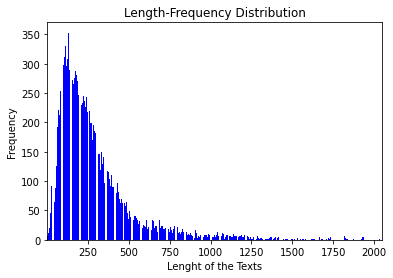

In [9]:
import seaborn as sns

plt.bar(list(Length_frequency.keys()), Length_frequency.values(), color ='b')
plt.xlim(1, 2048)

plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')

# Creating Word Embedding Model


## Defining the Model
Here we will define the model and necessary hyperparameters. Necessity of this hyperparameters will be briefly describe in the paper.

In [10]:
%%time
from gensim.models import Word2Vec
#different hyperparameter that can be used to test the system 

word2vec = Word2Vec(processed_data, size=100,  min_count=5, window=5, workers=40, cbow_mean=0,seed=1, sample=1e-4, hs=1, negative=5, iter=1)

CPU times: user 3min 45s, sys: 1.65 s, total: 3min 47s
Wall time: 2min 38s


In [11]:
# Save model in txt format
word2vec.wv.save_word2vec_format('test_w2v.txt')

In [12]:
# load the embedding vectors
from gensim.models import KeyedVectors

word_embedding_model = KeyedVectors.load_word2vec_format('test_w2v.txt', binary=False,encoding='utf-8')

In [19]:
vocabulary = word2vec.wv.vocab
print(len(vocabulary))

123771


In [ ]:
vocabulary = word_embedding_model.wv.vocab
print(len(vocabulary))

123771


<ipython-input-21-724f9987b02f>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  vocabulary = word_embedding_model.wv.vocab


In [ ]:
vocabulary

## Creating necessary List and Arrays
Create the necessary lists which will be used for further processing with our model.

In [13]:
%%time

model = word2vec
vocabulary = model.wv.vocab
word_to_vec_map = {}
words_to_index = {}
index_to_words = {}
frequency_of_words = {}

c =1
for w in vocabulary:
  word_to_vec_map[w] = model[w]
  words_to_index[w] = c
  index_to_words[c] = w
  frequency_of_words[w] = vocabulary[w].count
  c = c+1

print(len(vocabulary))

<timed exec>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


123771
CPU times: user 787 ms, sys: 31.5 ms, total: 818 ms
Wall time: 829 ms


In [14]:
word_to_vec_map

{'নাটোরের': array([ 0.05103481, -0.04128505,  0.00937207, -0.18505394,  0.17435832,
        -0.24676315,  0.01598901, -0.16603892,  0.01877268,  0.12042798,
        -0.08647238, -0.04475064,  0.01401573,  0.09080222, -0.09045359,
        -0.163545  ,  0.00908633, -0.11921929, -0.24531582, -0.01170492,
        -0.26475927, -0.13911298, -0.05714088, -0.03749397, -0.14570165,
         0.21777052,  0.06146142, -0.08897081,  0.18061677,  0.19082296,
         0.24920745,  0.09313695,  0.1912283 ,  0.09624463,  0.01318575,
         0.07140451,  0.1363234 ,  0.02886828,  0.09235153, -0.08268105,
        -0.0664516 ,  0.09292392,  0.29569167, -0.0976956 ,  0.12626036,
        -0.31436455, -0.13254482, -0.21881391,  0.02227597,  0.08325355,
         0.2359195 , -0.05003039, -0.14536713,  0.15438859,  0.01569645,
        -0.00919303,  0.00505016,  0.02962802,  0.12414419, -0.16680834,
         0.16627233,  0.03036803,  0.03737575, -0.14659974,  0.22625262,
         0.13601175,  0.1478582 ,  0.037

## Creating List of Check Words
Here we will create a list  through which we evaluate our model.

In [15]:
check_words = []
for i in range(10):
  check_words.append(processed_data[i][10])

cc = ['করিম','কুকুর','ভালো','চুয়েট']
check_words2 = []
for w in cc:
    if w in vocabulary:
      print(w)
      print(word_to_vec_map[w])
      check_words2.append(w)

করিম
[ 0.15056935  0.21756677  0.27232248 -0.2964826  -0.02858547 -0.11417394
 -0.06086883  0.20198098 -0.37169084  0.08483258  0.1416511  -0.27849093
  0.17027977  0.20743357 -0.27155766 -0.40856212 -0.4781549  -0.278843
 -0.37838325 -0.05511283 -0.5146852   0.00663595 -0.19750933  0.17632666
  0.28385612 -0.00635461  0.43136656  0.09959643  0.6011891   0.40353265
  0.4885381  -0.42377955  0.49632666  0.41653353  0.24592073 -0.3896788
  0.17988303  0.05121379  0.71477544  0.00500096 -0.18384497 -0.23214939
  0.32370713 -0.35775465 -0.33944505 -0.20028263  0.112628    0.36734563
  0.06901757 -0.04539356  0.03074006 -0.02733835 -0.7103532  -0.31311086
  0.38493967  0.00331475  0.15121466  0.09986275  0.21902731 -0.23468545
  0.2279113   0.41803247  0.0607337  -0.05204511  0.1789142   0.15736996
 -0.3732402   0.29909232  0.02159167  0.08449164  0.3672038   0.15604384
 -0.518231   -0.08748469 -0.4759789   0.13198254 -0.80930245 -0.44924492
  0.38158605 -0.18342978  0.30122447  0.2702772  

## Finding most frequent words and similar words

In [16]:
%%time
## Finding most frequent words within a frequency range
frequent_words = model.wv.index2entity[45:60]

## Finding the similar words of this frequent words
words_to_print = []
for w in check_words2:
  print('\n',w)
  words_to_print.append(w)
  similar_words = model.wv.most_similar(w, topn=10)
  for wr, vec in similar_words:
    words_to_print.append(wr)
    print(wr, vec)


 করিম
আজিম 0.7698909044265747
করিমকে 0.7222514152526855
করিমের 0.7170004844665527
বারী 0.7144179344177246
কবীর 0.7101954221725464
করিমও 0.6945369243621826
হক 0.6914367079734802
মজিদ 0.6888012886047363
হককে 0.6790228486061096
মিলন 0.6662830114364624

 কুকুর
চুলে 0.8239119052886963
দাঁতের 0.8203993439674377
মরা 0.8144363760948181
পোষা 0.8144015073776245
খেয়ে 0.8126438856124878
লগে 0.8112626075744629
বিড়াল 0.809667706489563
হাতির 0.8095667362213135
ঘাস 0.8052623271942139
ভঙ্গিতে 0.8043057918548584

 ভালো
ভালো 0.9063433408737183
ভাল 0.8933796286582947
খারাপ 0.8629099726676941
একটা 0.8229584097862244
ভালোই 0.8133219480514526
দারুণ 0.8132587671279907
তাই 0.8070060014724731
ব্যাটিং 0.8036998510360718
হয়তো 0.8010754585266113
কিন্তু 0.8008219003677368

 চুয়েট
রাবি 0.7484567761421204
রুয়েট 0.747719407081604
বুয়েট 0.7238947153091431
বিশ্ববিদ্যালয়ের 0.7145936489105225
বিশ্ববিদ্যালয় 0.7095850706100464
বিশ্ববিদ্যালয়ে 0.6985992193222046
চবি 0.6955682635307312
প্রকৌশল 0.6894985437393188
বিশ্ববিদ্য

## Installing Bangla Fonts
Here we will install bangla font to show bangla in TSNE plot.

In [ ]:
!wget -O Kalpurush.ttf https://www.dropbox.com/s/162f2fsxn38lh0r/Kalpurush.ttf?dl=0

## Plotting Using TSNE
Here frequent words will be shown using TSNE plot.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


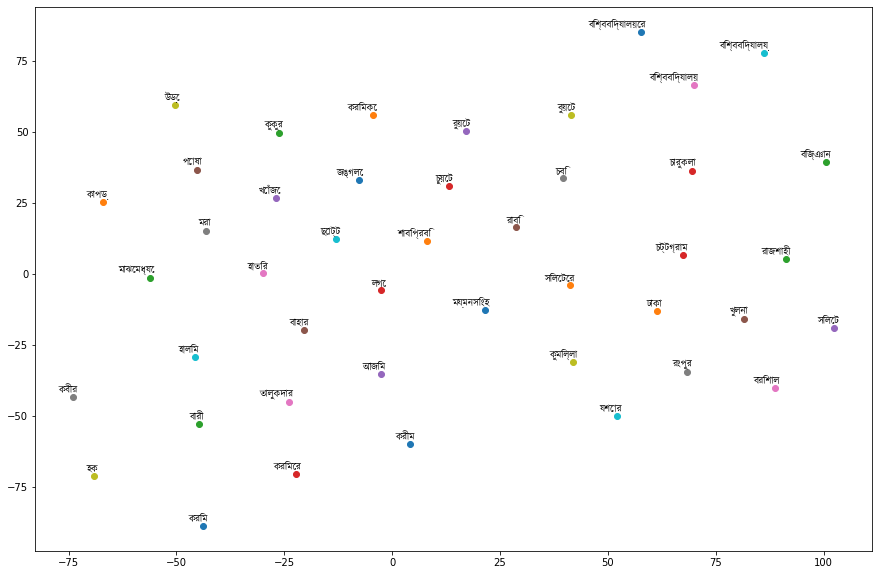

In [ ]:
from __future__ import print_function
from gensim.models import KeyedVectors
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

## To show bangla fonts
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
font_path = 'Kalpurush.ttf'
prop = fm.FontProperties(fname=font_path)
###

frequent_words = model.wv.index2entity[100:500]
frequent_words = words_to_print
# Limit number of tokens to be visualized
limit = len(frequent_words)
vector_dim = 100

# Getting tokens and vectors
words = frequent_words
embedding = np.array([])
i = 0
for w in words:
    embedding = np.append(embedding, model[w])

# Reshaping the embedding vector 
embedding = embedding.reshape(limit, vector_dim)

def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(15, 10))  # in inches
    for i, label in enumerate(labels):
        #print(label)
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 fontproperties=prop,
                 va='bottom')
   # os.chdir('/content/drive/Word_Embedding')
    #plt.savefig(filename)


# Creating the tsne plot [Warning: will take time]
tsne = TSNE(perplexity=30.0, n_components=2, init='pca', n_iter=5000)

low_dim_embedding = tsne.fit_transform(embedding)

# Finally plotting and saving the fig 
plot_with_labels(low_dim_embedding, words)
